# Analysis of Classification Model Training

This notebook documents the development and evaluation of a classification-based approach for lung abnormality detection from chest X-ray images. Following the challenges encountered with multi-class segmentation, a classification model was implemented (see `src_classification/`), aiming for a more practical and resource-efficient solution.



## 1. Introduction to the Classification Model

**Model Overview:**  
  The classification model predicts the overall class of each chest X-ray image (e.g., Healthy, COVID-19, Non-COVID infection), rather than segmenting pixel-level regions.
**Key Differences from Segmentation:**  
  - **Output:** Single label per image vs. pixel-wise mask.
  - **Complexity:** Simpler architecture, reduced computational requirements.
  - **Training:** Faster training and evaluation, less need for detailed mask annotations.
**Motivation:**  
  The shift to classification was driven by resource constraints and the limited improvement seen with segmentation when trying to adress model handling of COVID-19 regions within overall lung masks. 

__Comparison to Segmentation Approach__

**Advantages:**  
  - Faster training and inference.
  - Lower resource requirements.
  - More robust to class imbalance.
**Limitations:**  
  - No pixel-level localization.
  - May miss subtle abnormalities not present in global label.




## 2. Changes in Data Loading and Preprocessing

- **Data Loader Updates:**  
  - Instead of loading images and multi-class masks, the new pipeline loads images and their corresponding class labels.
  - Stratified train/val/test splits were retained, to help ensure balanced class representation.
- **Scripts:**  
  - Previous segmentation scripts are in `src/`.
  - Classification scripts are in `src_classification/` (e.g., `data_loader.py`, `train.py`, `model.py`).

### Iteration 1: Baseline ResNet50 Classifier

This first training run was primarily a debugging and environment check to ensure that the classification pipeline, data loading, and model training scripts functioned correctly on the Google Colab GPU setup. The model used a ResNet50 backbone with a final dense layer for 3-class output (Normal, Non-COVID, COVID-19).

#### Categorical Accuracy During Training
<td align="center">
      <b>General Categorical Accuracy for Initial run</b><br>
      <img src="../images/classification_model/iter1/epoch_categorical_accuracy.jpg" width="500"/><br>
      <em>X-axis = epochs, Y-axis = Categorical Accuracy. Orange = Training set, Blue = Validation set</em>
    </td>
    <td align="center">

#### Confusion Matrix & Metrics

The code below cell 4 prints the confusion matrix and a classification report (accuracy, precision, recall, F1-score for each class). These metrics provide a quick overview of how well the model distinguishes between the three classes on the test set.


__Overall accuracy__: 53%

| Class      | Precision | Recall | F1-score |
|------------|-----------|--------|----------|
| Normal     | 0.52      | 0.57   | 0.55     |
| Non-COVID  | 0.66      | 0.22   | 0.34     |
| COVID-19   | 0.50      | 0.77   | 0.60     |
| Macro avg  | ~0.56     | ~0.52–0.53 | ~0.50 |
| Weighted avg | ~0.56   | ~0.52–0.53 | ~0.50 |

__Confusion Matrix__:


<td align="center">
      <img src="../images/classification_model/iter1/confmatrix.png" width="500"/><br>
    </td>
    <td align="center">

__Interpretation__

- The model is best at identifying COVID-19 cases (high recall: 0.77), but often misclassifies Non-COVID and Normal cases as COVID-19.
- Non-COVID class is the weakest: low recall (0.22), meaning most Non-COVID cases are misclassified.
- Normal class has moderate precision and recall, but a significant number are misclassified as COVID-19.
- Overall accuracy is low (53%), which is expected for a first trial focused on debugging and pipeline validation.

#### Next Steps
- Unfreezing several layers of the ResNet50 base model in order to allow the model to learn additional features for this classification task.



Total images found for processing: 21715
Training samples after custom split: 17372
Validation samples after custom split: 2171
Test samples after custom split: 2172


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 

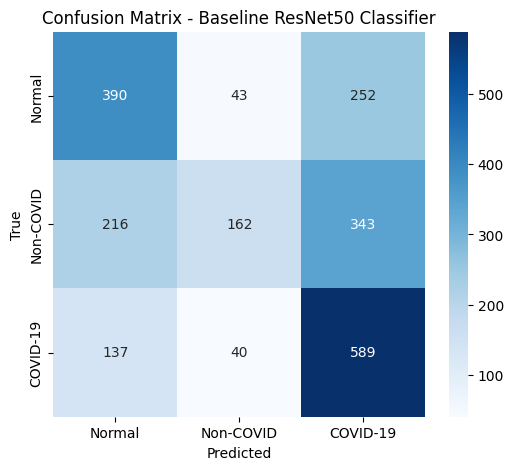

              precision    recall  f1-score   support

      Normal       0.52      0.57      0.55       685
   Non-COVID       0.66      0.22      0.34       721
    COVID-19       0.50      0.77      0.60       766

    accuracy                           0.53      2172
   macro avg       0.56      0.52      0.50      2172
weighted avg       0.56      0.53      0.50      2172



In [4]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Add project root to Python path
sys.path.append('c:/Users/leese/Documents/Projects/lung_abnormality_segmentation')

# Import functions and class labels
from src_classification.data_loader import get_classification_paths, get_classification_dataset, CLASS_LABELS, LABEL_TO_CLASS

# Set your data directory
DATA_DIR = 'c:/Users/leese/Documents/Projects/lung_abnormality_segmentation/data/raw/COVID-QU-Ex_Dataset'

# Get train/val/test splits
train_paths, train_labels, val_paths, val_labels, test_paths, test_labels = get_classification_paths(DATA_DIR)

# Create test dataset
test_dataset = get_classification_dataset(test_paths, test_labels, batch_size=64, shuffle=False)

# Load your trained model (update the path if needed)
model = load_model('../saved_models/saved_models_classification/best_classification_model.h5')

# Collect predictions and true labels
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))  # If labels are one-hot encoded
    y_pred.extend(np.argmax(preds, axis=1))   # Predicted class indices

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Prepare class names for confusion matrix
class_names = [LABEL_TO_CLASS[i] for i in range(len(CLASS_LABELS))]

# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Baseline ResNet50 Classifier')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

### Iteration 2: Unfreezing ResNet layers 


After unfreezing additional ResNet layers, from conv3_block4_out forward, and further training, the model’s performance improved significantly.

__Performance During Training__

<table>
  <tr>
    <td align="center">
      <b>Overall Categorical</b><br>
      <img src="../images/classification_model/iter2/epoch_categorical_accuracy.jpg" width="250"/><br>
    </td>
    <td align="center">
      <b>COVID-19 Accuracy</b><br>
      <img src="../images/classification_model/iter2/epoch_class_0_accuracy_covid19.jpg" width="250"/><br>
    </td>
  </tr>
  <tr>
    <td align="center">
      <b>Non-COVID Infections Accuracy</b><br>
      <img src="../images/classification_model/iter2/epoch_class_1_accuracy__non_covid.jpg" width="250"/><br>
    </td>
    <td align="center">
      <b>Normal Lung Accuracy</b><br>
      <img src="../images/classification_model/iter2/epoch_class_2_accuracy__normal.jpg" width="250"/><br>
    </td>
  </tr>
</table>
<i>x-axis = epoch, y-axis = Class IoU. Orange = Training Set, Blue = Validation Set</i>

Training accuracy steadily increases for all classes, indicating the model is learning from the training data.
Validation accuracy improves in the early epochs but then fluctuates and sometimes decreases in later epochs.

This pattern is a classic sign of overfitting:
The model fits the training data increasingly well, but its ability to generalize to unseen (validation) data does not improve and may even worsen.
Early epochs show better validation performance because the model has not yet memorized the training data and is still learning generalizable features.


__Classification Report__

| Class      | Precision | Recall | F1-score | Support |
|------------|-----------|--------|----------|---------|
| Normal     | 0.79      | 0.97   | 0.87     | 685     |
| Non-COVID  | 0.96      | 0.78   | 0.86     | 721     |
| COVID-19   | 0.96      | 0.94   | 0.95     | 766     |
| **Accuracy** |         |        | **0.90** | 2172    |
| Macro avg  | 0.91      | 0.90   | 0.89     | 2172    |
| Weighted avg | 0.91    | 0.90   | 0.90     | 2172    |

__Confusion Matrix__:


<td align="center">
      <img src="../images/classification_model/iter2/confmatrix.png" width="750"/><br>
    </td>
    <td align="center">

__Interpretation__

The model now achieves high accuracy (90%) and strong precision/recall for all classes.
COVID-19 and Non-COVID classes are much better distinguished compared to iteration 1.
Most errors are in distinguishing Non-COVID from Normal, but the majority of COVID-19 cases are correctly identified.
The model is now much more robust and less biased toward any single class.


__Visualisation of Predictions Using Model__ 

Below, the predictions from the model can be visualised.

<td align="center">
      <img src="../images/classification_model/iter2/Example_Model_Predictions.png" width="500"/><br>
    </td>
    <td align="center">


__Next Steps for Improvement__
Address remaining confusion between Normal and Non-COVID:
Use class weighting and attempt to avoid over-fitting occuring during latter epochs.



### Iteration 3: Unfreezing ResNet layers + Adding Class Weights 

Class weights were calculated as below and applied to model.fit().
Same architecture and unfrozen layers as iteration 2.
Added subtle class weights to address class imbalance in an attempt to improve model performance further.

class_weight = total_samples / (num_classes * samples_per_class)

class_weight = {
    0: 1.06,   # Normal
    1: 1.00,   # Non-COVID
    2: 0.95,   # COVID-19
}

__Performance During Training__

Training accuracy continued to rise, but validation accuracy dropped compared to iteration 2.
Overfitting is still present, and generalization to the validation set did not improve.

<table>
  <tr>
    <td align="center">
      <b>Overall Categorical</b><br>
      <img src="../images/classification_model/iter3/epoch_categorical_accuracy.jpg" width="250"/><br>
    </td>
    <td align="center">
      <b>COVID-19 Accuracy</b><br>
      <img src="../images/classification_model/iter3/epoch_class_2_accuracy_covid19.jpg" width="250"/><br>
    </td>
  </tr>
  <tr>
    <td align="center">
      <b>Non-COVID Infections Accuracy</b><br>
      <img src="../images/classification_model/iter3/epoch_class_1_accuracy__non_covid.jpg" width="250"/><br>
    </td>
    <td align="center">
      <b>Normal Lung Accuracy</b><br>
      <img src="../images/classification_model/iter3/epoch_class_0_accuracy__normal.jpg" width="250"/><br>
    </td>
  </tr>
</table>
<i>x-axis = epoch, y-axis = Class IoU. Orange = Training Set, Blue = Validation Set</i>




__Classification Report__

| Class        | Precision | Recall | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| Normal       | 0.75      | 0.91   | 0.82     | 685     |
| Non-COVID    | 0.89      | 0.71   | 0.79     | 721     |
| COVID-19     | 0.89      | 0.88   | 0.88     | 766     |
| **Accuracy** |           |        | **0.83** | 2172    |
| Macro avg    | 0.84      | 0.83   | 0.83     | 2172    |
| Weighted avg | 0.84      | 0.83   | 0.83     | 2172    |

__Confusion Matrix__:


<td align="center">
      <img src="../images/classification_model/iter3/confmatrix.png" width="500"/><br>
    </td>
    <td align="center">


__Interpretation__

Overall accuracy and F1-score decreased compared to iteration 2 (from 0.90 to 0.83).
Precision and recall for Non-COVID and COVID-19 classes dropped.
Class weighting did not improve generalization and may have disrupted the balance achieved in iteration 2.

__Conclusion__

Adding class weights did not improve performance; metrics declined across all classes.
The model is still affected by overfitting and some class confusion.
Further tuning or alternative regularization methods may be needed.




## Summary of Classification Model Training and Iterations

This notebook documents the development and evaluation of a classification-based deep learning model for lung abnormality detection from chest X-ray images. The project transitioned from multi-class segmentation to image-level classification to address resource constraints and improve practicality.

Three main training iterations were conducted:

- **Iteration 1:** Baseline ResNet50 classifier, used for pipeline debugging. Performance was limited, with overall accuracy at 53% and significant class confusion.
- **Iteration 2:** Unfreezing additional ResNet layers led to substantial improvements. The model achieved 90% accuracy, with strong precision and recall across all classes. This is the current best-performing iteration.
- **Iteration 3:** Added class weights to address class imbalance. However, this led to a decrease in overall accuracy (83%) and did not improve generalization, suggesting that class weighting disrupted the balance achieved in iteration 2.

### Next Steps for Model Improvement

To further enhance the model, the following strategies are recommended:

- **Data Augmentation:** Increase the diversity of training data using techniques such as random rotations, flips, brightness/contrast adjustments, and noise injection.
- **Understanding Where The Model is Failing:** False positives and True negatives should be examined visually to understand if there is a particular quality of these images that is causing consistent failure of the model. If patterns are found, data augmentation can heavily focus on these types of images to provide the model with opportunities to learn the correct classification for them.
- **Ensemble Methods:** Combine predictions from multiple models to improve robustness and generalization.
- **Hyperparameter Tuning:** Experiment with learning rates, batch sizes, optimizer types, and network architectures.
- **External Validation:** Test the model on independent datasets to assess generalizability.
- **Explainability:** Use methods like Grad-CAM to visualize model decisions and build trust for clinical use.

### Model State and Clinical Readiness

The model in its current best iteration (iteration 2) demonstrates high accuracy and balanced metrics, making it suitable for research and preliminary deployment. However, for clinical use, further steps are required:

- **External Validation:** The model must be tested on diverse, independent datasets to ensure reliability across populations.
- **Explainability:** Clinicians require transparent decision-making; visual explanations of predictions are essential.
- **Regulatory Compliance:** The model must meet medical device regulations and undergo rigorous validation.
- **Continuous Monitoring:** Post-deployment monitoring for drift and performance degradation is necessary.

### Low-Cost Deployment Strategy

To deploy the model in a resource-efficient manner:

- **Cloud-Based API:** Host the model using a lightweight cloud service (e.g., Azure Functions, AWS Lambda, or Google Cloud Run) to enable scalable, pay-as-you-go inference.
- **Edge Deployment:** Convert the model to TensorFlow Lite or ONNX for deployment on local devices (e.g., hospital PCs or portable tablets).
- **Containerization:** Package the model in a Docker container for easy distribution and reproducibility.
- **Web Interface:** Develop a simple web app for clinicians to upload images and receive predictions.

---